# CCL feature demo, SLAC 2018 DESC meeting

In this demo, we use CCL to set up a cosmology and show how to get different quantities of interest.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

We start by setting up a cosmology object. This holds the cosmological parameters and metadata. The cosmology object is needed as input for many other functions.

We set three of these to demonstrate the different options which are available.

In [3]:
# Basic cosmology with mostly default parameters and calculating setting.
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, 
                      Neff=3.046, Omega_k=0.)

# Cosmology which incorporates baryonic correction terms in the power.
cosmo_baryons = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, 
                              Neff=3.046, Omega_k=0., baryons_power_spectrum='bcm', 
                              bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0)

# Cosmology where the power spectrum will be computed with an emulator.
cosmo_emu = ccl.Cosmology(Omega_c=0.27, Omega_b=0.05, h=0.67, sigma8=0.83, n_s=0.96, 
                          Neff=3.04, Omega_k=0., transfer_function='emulator', 
                          matter_power_spectrum="emu")

## Background quantities

We can calculate a variety of background-type quantities. We set up a vector of scale factors at which to compute them.

In [4]:
z = np.linspace(0.0001, 5., 100)
a = 1. / (1.+z)

Compute ** distances **:

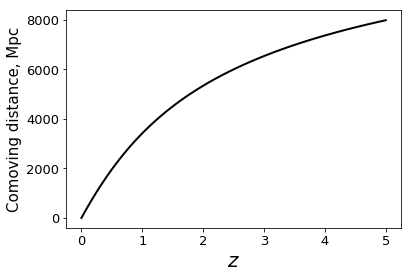

In [5]:
chi_rad = ccl.comoving_radial_distance(cosmo, a) 
chi_ang = ccl.comoving_angular_distance(cosmo,a)
lum_dist = ccl.luminosity_distance(cosmo, a)
dist_mod = ccl.distance_modulus(cosmo, a)


# Plot the comoving radial distance as a function of redshift, as an example.
plt.figure()
plt.plot(z, chi_rad, 'k', linewidth=2)
plt.xlabel('$z$', fontsize=20)
plt.ylabel('Comoving distance, Mpc', fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Compute ** growth quantities ** :

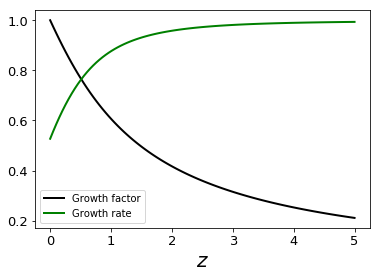

In [6]:
D = ccl.growth_factor(cosmo, a)
f = ccl.growth_rate(cosmo, a)

plt.figure()
plt.plot(z, D, 'k', linewidth=2, label='Growth factor')
plt.plot(z, f, 'g', linewidth=2, label='Growth rate')
plt.xlabel('$z$', fontsize=20)
plt.tick_params(labelsize=13)
plt.legend(loc='lower left')
plt.show()

The ratio of the ** Hubble parameter ** at scale factor a to H0:

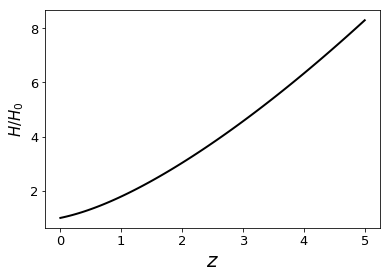

In [7]:
H_over_H0 = ccl.h_over_h0(cosmo, a)

plt.figure()
plt.plot(z, H_over_H0, 'k', linewidth=2)
plt.xlabel('$z$', fontsize=20)
plt.ylabel('$H / H_0$', fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

For each component of the matter / energy budget, we can get $\Omega_{\rm x}(z)$, the ** fractional energy density ** at $z \ne 0$.

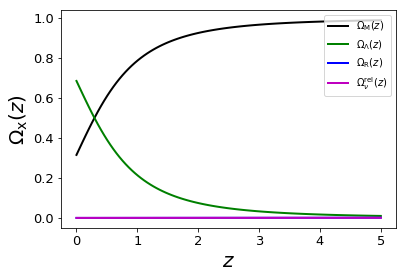

In [8]:
OmM_z = ccl.omega_x(cosmo, a, 'matter')
OmL_z = ccl.omega_x(cosmo, a, 'dark_energy')
OmR_z = ccl.omega_x(cosmo, a, 'radiation')
OmK_z = ccl.omega_x(cosmo, a, 'curvature')
OmNuRel_z = ccl.omega_x(cosmo, a, 'neutrinos_rel')
OmNuMass_z = ccl.omega_x(cosmo, a, 'neutrinos_massive')

plt.figure()
plt.plot(z, OmM_z, 'k', linewidth=2, label='$\Omega_{\\rm M}(z)$')
plt.plot(z, OmL_z, 'g', linewidth=2, label='$\Omega_{\Lambda}(z)$')
plt.plot(z, OmR_z, 'b', linewidth=2, label='$\Omega_{\\rm R}(z)$')
plt.plot(z, OmNuRel_z, 'm', linewidth=2, label='$\Omega_{\\nu}^{\\rm rel}(z)$')
plt.xlabel('$z$',fontsize=20)
plt.ylabel('$\Omega_{\\rm x}(z)$', fontsize= 20)
plt.tick_params(labelsize=13)
plt.legend(loc='upper right')
plt.show()

## Matter power spectra and related quantities

To compute the matter power spectrum, we define a vector of k values, and use the same z values as above.

In [9]:
k = np.logspace(-3, 2, 100)

The first power spectrum call for a given cosmology will take a few seconds to run, because we are computing $P(k)$ with CLASS and initializing splines. Further calls will be much quicker because they just access the precomputed splined values.

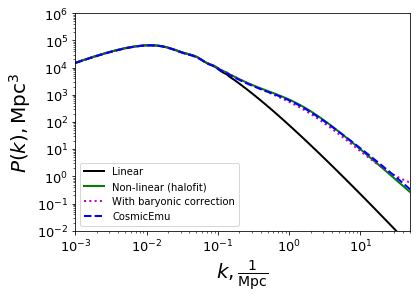

In [10]:
z_Pk = 0.2
a_Pk = 1. / (1.+z_Pk)

Pk_lin = ccl.linear_matter_power(cosmo, k, a_Pk)
Pk_nonlin = ccl.nonlin_matter_power(cosmo, k, a_Pk)
Pk_baryon = ccl.nonlin_matter_power(cosmo_baryons, k, a_Pk)
Pk_emu = ccl.nonlin_matter_power(cosmo_emu, k, a_Pk)

plt.figure()
plt.loglog(k, Pk_lin, 'k', linewidth=2, label='Linear')
plt.loglog(k, Pk_nonlin, 'g', linewidth=2, label='Non-linear (halofit)')
plt.loglog(k, Pk_baryon, 'm', linewidth=2, linestyle=':', label='With baryonic correction')
plt.loglog(k, Pk_emu, 'b', linewidth=2, linestyle = '--', label='CosmicEmu')
plt.xlabel('$k, \\frac{1}{\\rm Mpc}$', fontsize=20)
plt.ylabel('$P(k), {\\rm Mpc^3}$', fontsize=20)
plt.xlim(0.001, 50)
plt.ylim(0.01, 10**6)
plt.tick_params(labelsize=13)
plt.legend(loc='lower left')
plt.show()


We can also compute $\sigma_{\rm R}$, the RMS variance in a top-hat of radius R Mpc, as well as the special case of $\sigma_{8}$.

In [11]:
R = np.linspace(5, 20, 15)

sigmaR = ccl.sigmaR(cosmo, R)
sigma8 = ccl.sigma8(cosmo)

print("sigma8 =", sigma8)

('sigma8 =', 0.8404211724824795)


## $C_\ell$ spectra

We can compute $C_\ell$ for galaxy counts, galaxy lensing, and CMB lensing, for autocorrelations or any cross-correlation.

The first step to getting $C_\ell$'s involving galaxy counts or lensing is to define a photo-z probability function and a galaxy redshift distribution. CCL allows you to flexibly design your own photo-z function, but fo the purposes of demonstration we use the included Gaussian function. 

In [12]:
z_pz = np.linspace(0.3, 3., 3)  # Define the edges of the photo-z bins.
pz = ccl.PhotoZGaussian(sigma_z0=0.05)

We get the galaxy redshift distribution for each tomographic bin, for galaxy counts and galaxy lenisng.

In [13]:
dNdz_nc = [ccl.dNdz_tomog(z=z, dNdz_type='nc', zmin=z_pz[zi], zmax=z_pz[zi+1], pz_func=pz)
           for zi in range(0, len(z_pz)-1)]
dNdz_len = [ccl.dNdz_tomog(z=z, dNdz_type='wl_fid', zmin=z_pz[zi], zmax=z_pz[zi+1], pz_func=pz)
            for zi in range(0, len(z_pz)-1)]

Let's assume a toy linear galaxy bias for our galaxy-count tracer.

In [14]:
bias = 2.*np.ones(len(z))

We can now set up tracer objects for CMB lensing and for each tomographic bin of galaxy counts and galaxy lensing. 

In [15]:
gal_counts = ([ccl.ClTracerNumberCounts(cosmo, has_rsd=False, has_magnification=False, 
                                        n=dNdz_nc[zi], bias=bias, z=z)  for zi in range(0, len(z_pz)-1)])

gal_lens = ([ccl.ClTracerLensing(cosmo, has_intrinsic_alignment = False, 
                                 n=dNdz_len[zi], z=z) for zi in range(0, len(z_pz)-1)])

cmb_lens = [ccl.ClTracerCMBLensing(cosmo, z_source=1089.)]

all_tracers = gal_counts + gal_lens + cmb_lens

With these tracer objects, we can now get $C_\ell$'s.

In [16]:
ell = np.linspace(1, 2000, 2000)

n_tracer = len(all_tracers)

c_ells = ([[ccl.angular_cl(cosmo, all_tracers[ni], all_tracers[nj], ell) 
            for ni in range(0, n_tracer)] for nj in range(0, n_tracer)])

We can plot a couple of examples

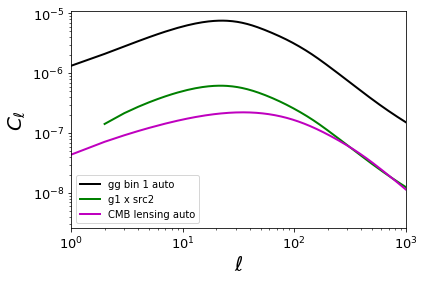

In [17]:
plt.figure()
plt.loglog(ell, c_ells[0][0], 'k', linewidth=2, label='gg bin 1 auto')
plt.loglog(ell, c_ells[0][3], 'g', linewidth=2, label='g1 x src2')
plt.loglog(ell, c_ells[4][4], 'm', linewidth=2, label='CMB lensing auto')
plt.xlabel('$\ell$', fontsize=20)
plt.ylabel('$C_\ell$', fontsize=20)
plt.xlim(1, 1000)
plt.tick_params(labelsize=13)
plt.legend(loc='lower left')
plt.show()

# Correlation functions

From the $C_\ell$s, we can then get correlatoin functions. Let's do an example of each type.

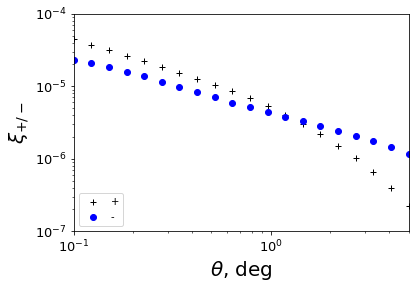

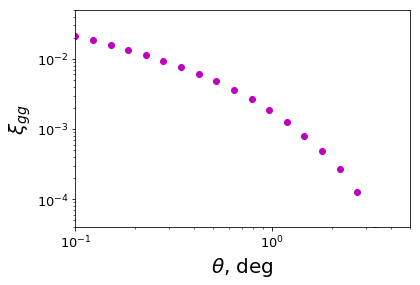

In [18]:
theta_deg = np.logspace(-1, np.log10(5.), 20) # Theta is in degrees

xi_plus = ccl.correlation(cosmo, ell, c_ells[2][2], theta_deg, corr_type='L+', method='FFTLog')
xi_minus = ccl.correlation(cosmo, ell, c_ells[2][2], theta_deg, corr_type='L-', method='FFTLog')
xi_gg = ccl.correlation(cosmo, ell, c_ells[0][0], theta_deg, corr_type='GG', method='FFTLog')

plt.figure()
plt.loglog(theta_deg, xi_plus, '+k', label='+')
plt.loglog(theta_deg, xi_minus, 'ob', label='-')
plt.xlabel('$\\theta$, deg', fontsize=20)
plt.ylabel('$\\xi_{+ / -}$', fontsize=20)
plt.xlim(0.1, 5)
plt.ylim(10**(-7), 10**(-4))
plt.tick_params(labelsize=13)
plt.legend(loc='lower left')
plt.show()

plt.figure()
plt.loglog(theta_deg, xi_gg, 'mo', linewidth=2)
plt.xlabel('$\\theta$, deg', fontsize=20)
plt.ylabel('$\\xi_{gg}$', fontsize=20)
plt.xlim(0.1, 5)
plt.ylim(4*10**(-5), 0.05)
plt.tick_params(labelsize=13)
plt.show()

# Halo Mass Function & Halo Bias

We can compute the halo bias and halo mass function from Tinker et al. 

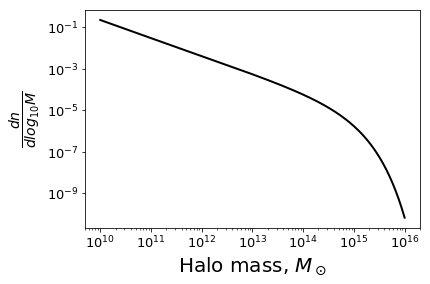

In [19]:
halo_mass = np.logspace(10, 16, 200)

hmf = ccl.massfunc(cosmo, halo_mass, a=1., odelta=200)

plt.figure()
plt.loglog(halo_mass, hmf, 'k', linewidth=2)
plt.xlabel('Halo mass, $M_\odot$', fontsize=20)
plt.ylabel('$\\frac{dn}{dlog_{10}M}$', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

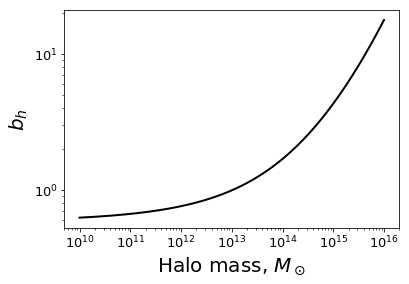

In [20]:
halo_bias = ccl.halo_bias(cosmo, halo_mass, a=1., odelta=200)

plt.figure()
plt.loglog(halo_mass, halo_bias, 'k', linewidth=2)
plt.xlabel('Halo mass, $M_\odot$', fontsize=20)
plt.ylabel('$b_h$', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()